# Simple event loop

In [1]:
import time
import random
import sys
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

class EventLoop:
        
    def __init__(self):
        self.command = None
        self.status = None
        self.handlers = {'interrupt':self.handle_interrupt}
        self.resolution = 0.1
    
    def handle_interrupt(self):
        print 'Stopping event loop... Y.G.!'
        self.stop()
    
    def stop(self):
        self.commend = 'stop'
        
    def add_handler(self, func, event):
        self.handlers[event] = func
    
    def start(self):
        self.command = 'run'
        try:
            self.loop()
        except KeyboardInterrupt:
            self.handle_event('interrupt')
    
    def handle_event(self, event):
        self.handlers[event]()
    
    def loop(self):
        self.command = 'loop'
        
        while self.command != 'stop':
            self.status = 'running'
            time.sleep(self.resolution)

In [2]:
el = EventLoop()
el.start()

Stopping event loop... Y.G.!


# Example from the book: circle

In [3]:
%matplotlib notebook

from matplotlib import pyplot as plt
import time

class MousePressAndRelease():
    def __init__(self):
        self.figure, self.axes = plt.subplots()
        self.axes.set_aspect(1)
        self.axes.grid(True)
        self.figure.canvas.mpl_connect('button_press_event', self.press)
        self.figure.canvas.mpl_connect('button_release_event', self.release)
    
    def press(self, event):
        self.start_time = time.time()
    
    def release(self, event):
        self.end_time = time.time()
        self.draw_circles(event)
    
    def draw_circles(self, event):
        size = 4*(self.end_time - self.start_time) ** 2
        c1 = plt.Circle([event.xdata, event.ydata], 0.002)
        c2 = plt.Circle([event.xdata, event.ydata], 0.02*size, alpha=0.2)
        self.axes.add_artist(c1)
        self.axes.add_artist(c2)
        self.figure.show()
    
    def start(self):
        self.figure.show()

<IPython.core.display.Javascript object>


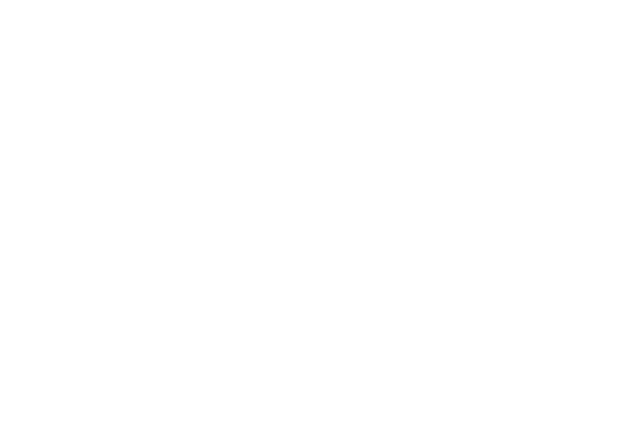

In [4]:
test = MousePressAndRelease()
test.start()

# My example of drawing golden lines

In [5]:
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

class MousePressAndRelease():
    
    def __init__(self):
        self.golden_pts = np.array([0.236, 0.382, 0.618, 0.809])
        self.figure, self.axes = plt.subplots()
        self.axes.set_aspect(1)
        self.figure.canvas.mpl_connect('button_press_event', self.press)
        self.figure.canvas.mpl_connect('button_release_event', self.release)
    
    def press(self, event):
        self.y_start = event.ydata
    
    def release(self, event):
        self.y_end = event.ydata
        self.golden_line()
    
    def golden_line(self):
        high = max(self.y_start, self.y_end)
        low = min(self.y_start, self.y_end)
        middle_pt = low + (high - low) * self.golden_pts
        self.axes.axhline(y=low, linewidth=3, linestyle='-')
        self.axes.axhline(y=high, linewidth=3, linestyle='-')
        for pt in middle_pt:
            self.axes.axhline(y=pt, linewidth=1, linestyle=':')
        self.figure.show()
    
    def start(self):
        self.figure.show()

<IPython.core.display.Javascript object>


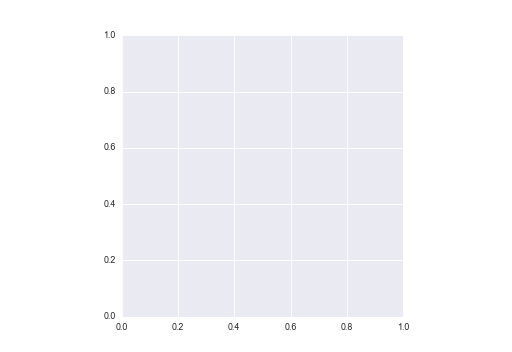

In [6]:
with plt.style.context(('seaborn-paper')):
    test = MousePressAndRelease()
    test.start()

<IPython.core.display.Javascript object>


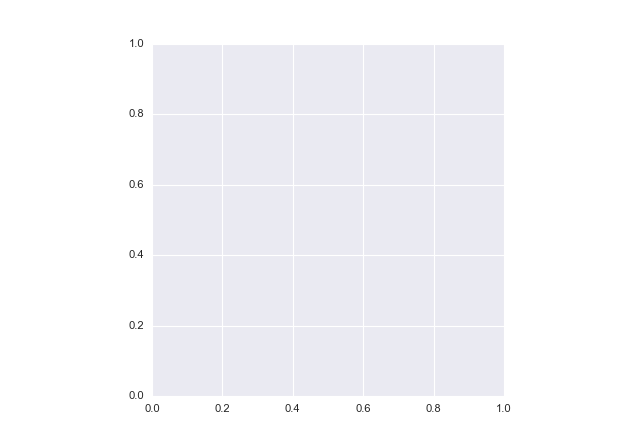

In [7]:
test = MousePressAndRelease()
test.start()

In [8]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

# Keyboard event

In [9]:
print plt.get_backend()
print 
sorted(set(mpl.rcsetup.interactive_bk + mpl.rcsetup.non_interactive_bk + mpl.rcsetup.all_backends))

nbAgg



[u'CocoaAgg',
 u'GTK',
 u'GTK3Agg',
 u'GTK3Cairo',
 u'GTKAgg',
 u'GTKCairo',
 u'MacOSX',
 u'Qt4Agg',
 u'Qt5Agg',
 u'TkAgg',
 u'WX',
 u'WXAgg',
 u'WebAgg',
 u'agg',
 u'cairo',
 u'emf',
 u'gdk',
 u'nbAgg',
 u'pdf',
 u'pgf',
 u'ps',
 u'svg',
 u'template']

In [10]:
def make_data(n, c):
    r = 4 * c * np.random.rand(n) ** 2
    theta = 2 * np.pi * np.random.rand(n)
    area = 200 * r**2 * np.random.rand(n)
    return (r, area, theta)

def generate_data(n, c):
    while True:
        yield make_data(n, c)
                 
def make_plot(radius, area, theta, axes=None):
    scatter = axes.scatter(
        theta, radius, c=theta, s=area, cmap=cmap)
    scatter.set_alpha(0.75)

def update_plot(radius, area, theta, event):
    figure = event.canvas.figure
    axes = figure.gca()
    make_plot(radius, area, theta, axes)
    event.canvas.draw()

In [11]:
class Carousel:
    def __init__(self, data):
        (self.left, self.right) = ([], [])
        self.gen = data
        self.last_key = None

    def start(self, axes):
        make_plot(*self.next(), axes=axes)

    def prev(self):
        if not self.left:
            return []
        data = self.left.pop()
        self.right.insert(0, data)
        return data

    def next(self):
        if self.right:
            data = self.right.pop(0)
        else:
            data = next(self.gen)
        self.left.append(data)
        return data

    def reset(self):
        self.right = self.left + self.right
        self.left = []
        
    def dispatch(self, event):
        if event.key == "right":
            self.handle_right(event)
        elif event.key == "left":
            self.handle_left(event)
        elif event.key == "r":
            self.handle_reset(event)

    def handle_right(self, event):
        print "Got right key ..."
        if self.last_key == "left":
            self.next()
        update_plot(*self.next(), event=event)
        self.last_key = event.key
    def handle_left(self, event):
        print "Got left key ..."
        if self.last_key == "right":
            self.prev()
        data = self.prev()
        if data:
            update_plot(*data, event=event)
        self.last_key = event.key

    def handle_reset(self, event):
        print "Got reset key ..."
        self.reset()
        update_plot(*self.next(), event=event)
        self.last_key = event.key

In [12]:
class CarouselManager:
    def __init__(self, density=300, multiplier=1):
        (figure, self.axes) = plt.subplots(
            figsize=(12,12), subplot_kw={"polar": "True"})
        self.axes.hold(False)
        data = generate_data(density, multiplier)
        self.carousel = Carousel(data)
        _ = figure.canvas.mpl_connect(
            'key_press_event', self.carousel.dispatch)
    def start(self):
        self.carousel.start(self.axes)
        plt.show()

# Use the default `%matplotlib notebook` will have keyboard event well. But in ipython need use `plt.switch_backend('MacOSX')`

<IPython.core.display.Javascript object>


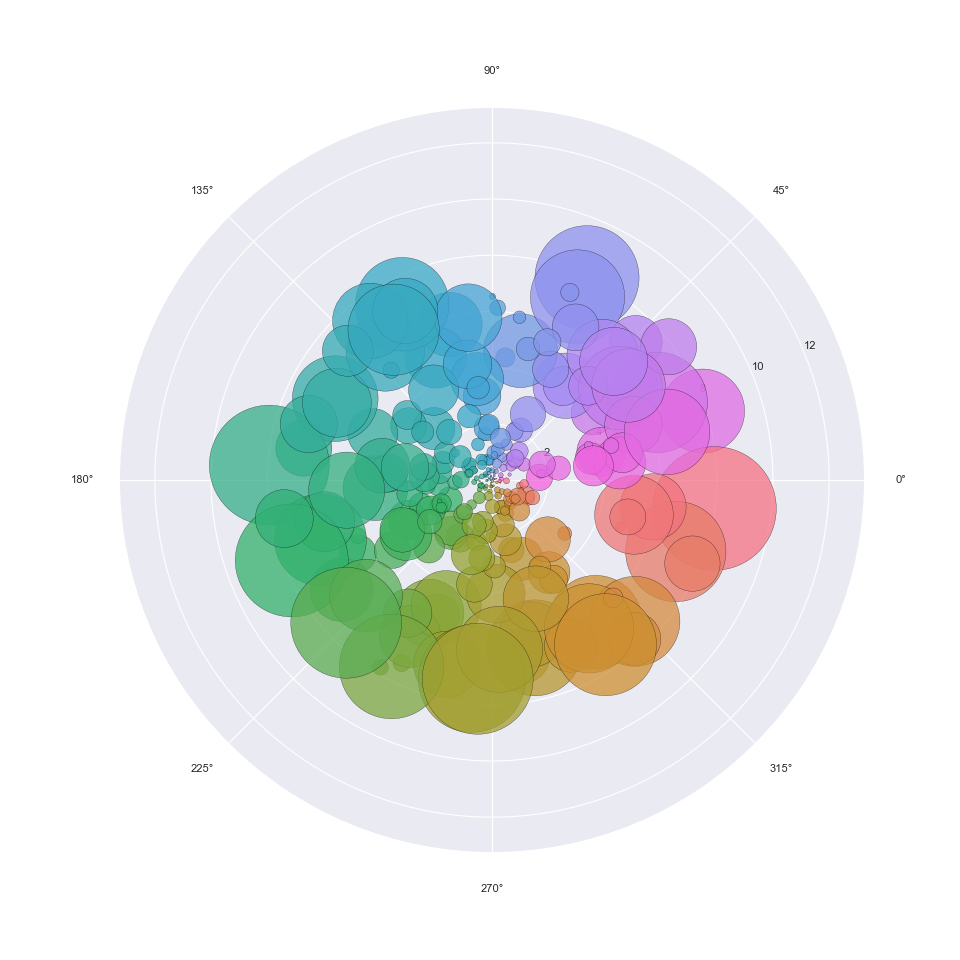

In [13]:
pallete_name = "husl"
colors = sns.color_palette(pallete_name, 8)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors)
cm = CarouselManager(multiplier=2)
cm.start()